This jupyter notebook is to get the confidence interval for each evaluation metrics for our best model. Including macro F1 score, micro F1 score and F1 score for each disease.

# Read in bootstrap results

In [1]:
import pickle

In [2]:
with open("./f1_score_dict_n_size=0.8.pickle", "rb") as fin:
    f1_score_dict = pickle.load(fin)

In [3]:
with open("./sample_indices_lists_n_size=0.8.pikcle", "rb") as fin:
    sample_indices_lists = pickle.load(fin)

# To get the confident interval for each metrics

In [4]:
import numpy as np

In [5]:
# define a function to get the confident interval for the metrics
def get_confident_interval(metrics_list, alpha):
    """
    Args:
        - metrics_list: list containing all the bootstrap value for this metrics
        - alpha: the chosen percentile
    """
    p = ((1.0 - alpha) / 2.0) * 100
    #lower = max(0.0, np.percentile(metrics_list, p))
    lower = np.percentile(metrics_list, p)
    p = (alpha + ((1.0-alpha)/2.0)) * 100
    #upper = min(1.0, np.percentile(metrics_list, p))
    upper = np.percentile(metrics_list, p)
    #print("{}% confidence interval {}% and {}%".format(alpha*100, lower*100, upper*100))    
    print("{}% confidence interval {} and {}".format(alpha*100, lower, upper))

In [6]:
### for macro f1 score ###
macro_f1_scores = [stats["eval_f1_macro"] for stats in f1_score_dict]

get_confident_interval(macro_f1_scores, 0.95)

95.0% confidence interval 0.3282491377035809 and 0.48189159247438285


In [7]:
min(macro_f1_scores), max(macro_f1_scores)

(0.2803347476216913, 0.5275429827545599)

In [8]:
### for micro f1 score ###
micro_f1_scores = [stats["eval_f1_micro"] for stats in f1_score_dict]

get_confident_interval(micro_f1_scores, 0.95)

95.0% confidence interval 0.41776315789473684 and 0.5328947368421053


In [9]:
min(micro_f1_scores), max(macro_f1_scores)

(0.35855263157894735, 0.5275429827545599)

In [10]:
### for Pure Alzheimer ###
pure_alz_f1_scores = [stats["eval_f1s"][0] for stats in f1_score_dict]

get_confident_interval(pure_alz_f1_scores, 0.95)

95.0% confidence interval 0.48743548387096775 and 0.626584388185654


In [11]:
### for Pure LBD ###
pure_lbd_f1_scores = [stats["eval_f1s"][1] for stats in f1_score_dict]

get_confident_interval(pure_lbd_f1_scores, 0.95)

95.0% confidence interval 0.08000000000000002 and 0.518599033816425


In [12]:
min(pure_lbd_f1_scores), max(pure_lbd_f1_scores)

(0.0, 0.6153846153846153)

In [13]:
### for MIX AD + LBD ###
mix_f1_scores = [stats["eval_f1s"][2] for stats in f1_score_dict]

get_confident_interval(mix_f1_scores, 0.95)

95.0% confidence interval 0.15381355932203394 and 0.37209302325581395


In [14]:
### for others ###
others_f1_scores = [stats["eval_f1s"][3] for stats in f1_score_dict]

get_confident_interval(others_f1_scores, 0.95)

95.0% confidence interval 0.40579710144927533 and 0.5912079937479067


# Get the mean of and histgram of each metrics

In [15]:
import matplotlib.pyplot as plt
from statistics import mean

In [16]:
alpha = 0.95

mean is 0.4049093522543169
95.0% confidence interval 0.3282491377035809 and 0.48189159247438285


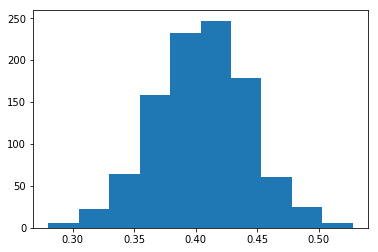

In [17]:
### macro_f1_scores ###
print("mean is", mean(macro_f1_scores))
get_confident_interval(macro_f1_scores, alpha)
plt.hist(macro_f1_scores)
plt.show()

mean is 0.47409210526315787
95.0% confidence interval 0.41776315789473684 and 0.5328947368421053


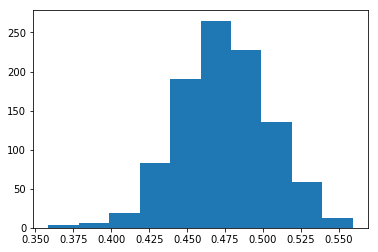

In [18]:
### micro_f1_scores ###
print("mean is", mean(micro_f1_scores))
get_confident_interval(micro_f1_scores, alpha)
plt.hist(micro_f1_scores)
plt.show()

mean is 0.5625769570198287
95.0% confidence interval 0.48743548387096775 and 0.626584388185654


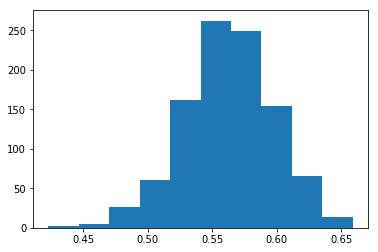

In [19]:
### pure_alz_f1_scores ###
print("mean is", mean(pure_alz_f1_scores))
get_confident_interval(pure_alz_f1_scores, alpha)
plt.hist(pure_alz_f1_scores)
plt.show()

mean is 0.2951991072571849
95.0% confidence interval 0.08000000000000002 and 0.518599033816425


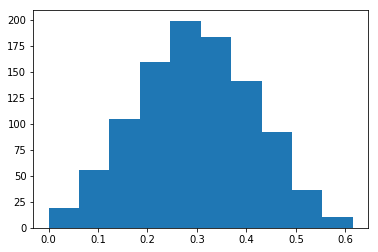

In [20]:
### pure_lbd_f1_scores ###
print("mean is", mean(pure_lbd_f1_scores))
get_confident_interval(pure_lbd_f1_scores, alpha)
plt.hist(pure_lbd_f1_scores)
plt.show()

mean is 0.2646275317380033
95.0% confidence interval 0.15381355932203394 and 0.37209302325581395


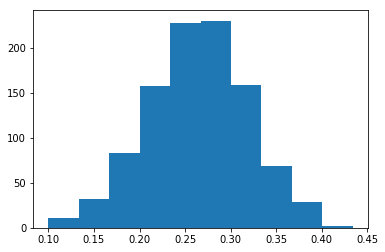

In [21]:
### mix_f1_scores ###
print("mean is", mean(mix_f1_scores))
get_confident_interval(mix_f1_scores, alpha)
plt.hist(mix_f1_scores)
plt.show()

mean is 0.4972338130022507
95.0% confidence interval 0.40579710144927533 and 0.5912079937479067


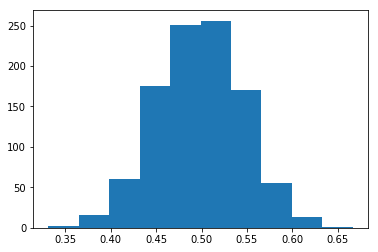

In [22]:
### others ###
print("mean is", mean(others_f1_scores))
get_confident_interval(others_f1_scores, alpha)
plt.hist(others_f1_scores)
plt.show()